<a href="https://colab.research.google.com/github/ruchi-sharma1/titanic_competition_naive_bayes/blob/main/naive_bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install kaggle

Use below code to upload a kaggle json file that you will get after cliclicking on generate new api token in settoong section of your kaggle account. 
This file will contain your username and a key which will be forwarded automatically to next block of code 

In [63]:
#from google.colab import files
#files.upload()

In [59]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

Below is the api command you will get on the page of dataset

In [61]:
#paste the api command you have copied from kaggle
#!kaggle competitions download -c titanic

In [20]:
import pandas as pd
import numpy as np

In [27]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [28]:
len(test)

418

In [29]:
df=pd.DataFrame(train)
df1=pd.DataFrame(test)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df.drop(['PassengerId','Embarked', 'SibSp', 'Name', 'Parch', 'Ticket', 'Cabin'], axis='columns', inplace=True)
df1.drop(['PassengerId','Embarked', 'SibSp', 'Name', 'Parch', 'Ticket', 'Cabin'], axis='columns', inplace=True)

In [32]:
y=df.Survived
x= df.drop(['Survived'], axis='columns')
#x1=df1.drop(['Survived'], axis='columns')

In [33]:
print(len(y))

891


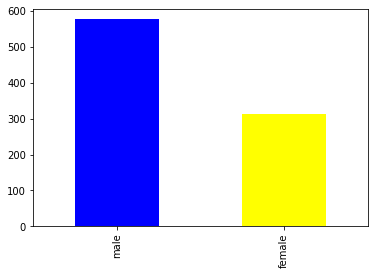

In [34]:
train.Sex.value_counts().plot(kind = 'bar', color = ['blue', 'yellow']);


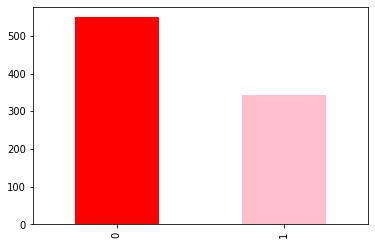

In [35]:
train.Survived.value_counts().plot(kind = 'bar', color = ['red', 'pink']);


In [36]:
pd.crosstab(train.Survived, train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


This models can't handle text so we need to do one hot encoding for dummies. Dummies will convert male and female into seperate column with 1 and 0 value

In [37]:
dummies= pd.get_dummies(x.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [38]:
dummies1= pd.get_dummies(df1.Sex)


now I will add these columns to our input i.e x

In [39]:
x= pd.concat([x,dummies], axis='columns')
x.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [40]:
df1= pd.concat([df1,dummies1], axis='columns')
df1.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,34.5,7.8292,0,1
1,3,female,47.0,7.0000,1,0
2,2,male,62.0,9.6875,0,1
3,3,male,27.0,8.6625,0,1
4,3,female,22.0,12.2875,1,0


I am dropping male column also as only female column will be enough

In [41]:
x.drop(['Sex','male'],axis='columns',inplace=True)
x.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [42]:
df1.drop(['Sex','male'],axis='columns',inplace=True)
df1.head()

,Pclass,Age,Fare,female
0,3,34.5,7.8292,0
1,3,47.0,7.0000,1
2,2,62.0,9.6875,0
3,3,27.0,8.6625,0
4,3,22.0,12.2875,1


Now check outliers, that whether there is any NaN value in tha dataset

In [43]:
x.columns[x.isna().any()]

Index(['Age'], dtype='object')

In [44]:
df1.columns[df1.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [45]:
x.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

There are some NaN values in column of age so we will replace them with mean

In [46]:
x.Age=x.Age.fillna(x.Age.mean())
x.Age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [47]:
df1.Age=df1.Age.fillna(df1.Age.mean())
df1.Fare=df1.Fare.fillna(df1.Fare.mean())
df1.Age.head()
df1.head()

,Pclass,Age,Fare,female
0,3,34.5,7.8292,0
1,3,47.0,7.0000,1
2,2,62.0,9.6875,0
3,3,27.0,8.6625,0
4,3,22.0,12.2875,1


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4)

In [49]:
len(x_test)

357

In [50]:
len(x_train)

534

In [51]:
len(y_test)

357

I am using gaussian naive bayes here

In [52]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB(var_smoothing=1e-08)

In [53]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-08)

In [54]:
model.score(x_test, y_test)

0.7955182072829131